In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load dataset and build noisy images

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

numpixels = np.multiply(*x_train.shape[1:]) #mi dice quanti pixel ci sono in ogni immagine
imshape = x_train.shape[1:] #memorizzo la dimensione dell'immagine

We will not be using convolution layers. We need to flatten the input...

In [ ]:
noisy_x_train = x_train.reshape(-1, numpixels)
noisy_x_test = x_test.reshape(-1, numpixels)

print("noisy_x_train.shape: ", noisy_x_train.shape)
print("noisy_x_test.shape: ", noisy_x_test.shape)

noisy_x_train.shape:  (60000, 784)
noisy_x_test.shape:  (10000, 784)


Add random uniform noise to the image

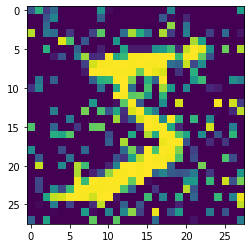

In [ ]:

'''
Codice che ha scritto lui
soglia = 0,7
perturbed_pixes = np.random.uniform (size = noisy_x_train.shape)> soglia
noisy_x_train = noisy_x_train + np.random.uniform (size = noisy_x_train.shape) * 255 * perturbed_pixes
noisy_x_train = noisy_x_train.clip (0,255)

perturbed_pixes = np.random.uniform (size = noisy_x_test.shape)> soglia
noisy_x_test = noisy_x_test + np.random.uniform (size = noisy_x_test.shape) * 255 * perturbed_pixes
noisy_x_test = noisy_x_test.clip (0,255)
'''



soglia = 0.7
pixel_da_perturbare = np.random.uniform(size=noisy_x_train.shape) > soglia #una volta che ho selezionato un valore casuale se questo valore è maggiore di 0,7 allora quel pixel verrà cambiato
noise = np.random.uniform(size=noisy_x_train.shape)*255*pixel_da_perturbare
noisy_x_train = noisy_x_train + noise
noisy_x_train = noisy_x_train.clip(0,255) #porto tutti i valori dei pixel tra 0 e 255


pixel_da_perturbare = np.random.uniform(size=noisy_x_test.shape) > soglia #una volta che ho selezionato un valore casuale se questo valore è maggiore di 0,7 allora quel pixel verrà cambiato
noise = np.random.uniform(size=noisy_x_test.shape)*255*pixel_da_perturbare
noisy_x_test = noisy_x_test + noise
noisy_x_test = noisy_x_test.clip(0,255) #porto tutti i valori dei pixel tra 0 e 255



es = noisy_x_train[0]
plt.imshow(es.reshape(28,28))





# Building and fitting the model

Create a keras shallow autoencoder. You are free to experiment with the architecture. Here are some choices that work well enough.

- **input layer**: ...
- **h**: dense layer, hsize neurons,  activation:linear
- **output**: dense layer -- ...

In [ ]:
hsize = 30 #potremmo mettere qualsiasi numero perchè è la dimensione della rappresentazione latente h
#(che quindi chiediamo che sia un vettore di 30 elementi)
#che sicuramente è più piccolo del vettore di partenza che è formato da 784 elementi

input = keras.Input(shape=[numpixels,])
h = Dense(hsize, activation="linear", name="h")(input)
output = Dense(numpixels, activation="linear", name="output")(h)

model = keras.Model(input, output)

#model.layers[1].trainable=False #dico che i parametri del livello h (primo livello) non sono addestrabili,
#questo è utile quando faccio transfer learning

In [ ]:
model.compile(loss="mean_squared_error")
model.summary()

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
h (Dense)                    (None, 30)                23550     
_________________________________________________________________
output (Dense)               (None, 784)               24304     
Total params: 47,854
Trainable params: 47,854
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(noisy_x_train, x_train.reshape(-1,784), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 1394.2369
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 1394.1742
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 1394.2521


In [ ]:
preds = model.predict(noisy_x_test)
preds = preds.clip(0,255).astype(np.uint8)

# Plot results

In [ ]:
def plot_imgs_grid(images):
    plt.figure(figsize=(30,10))
    plt.gray()

    for i in range(50):
        ax = plt.subplot(5,10,i+1)
        ax.imshow(images[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

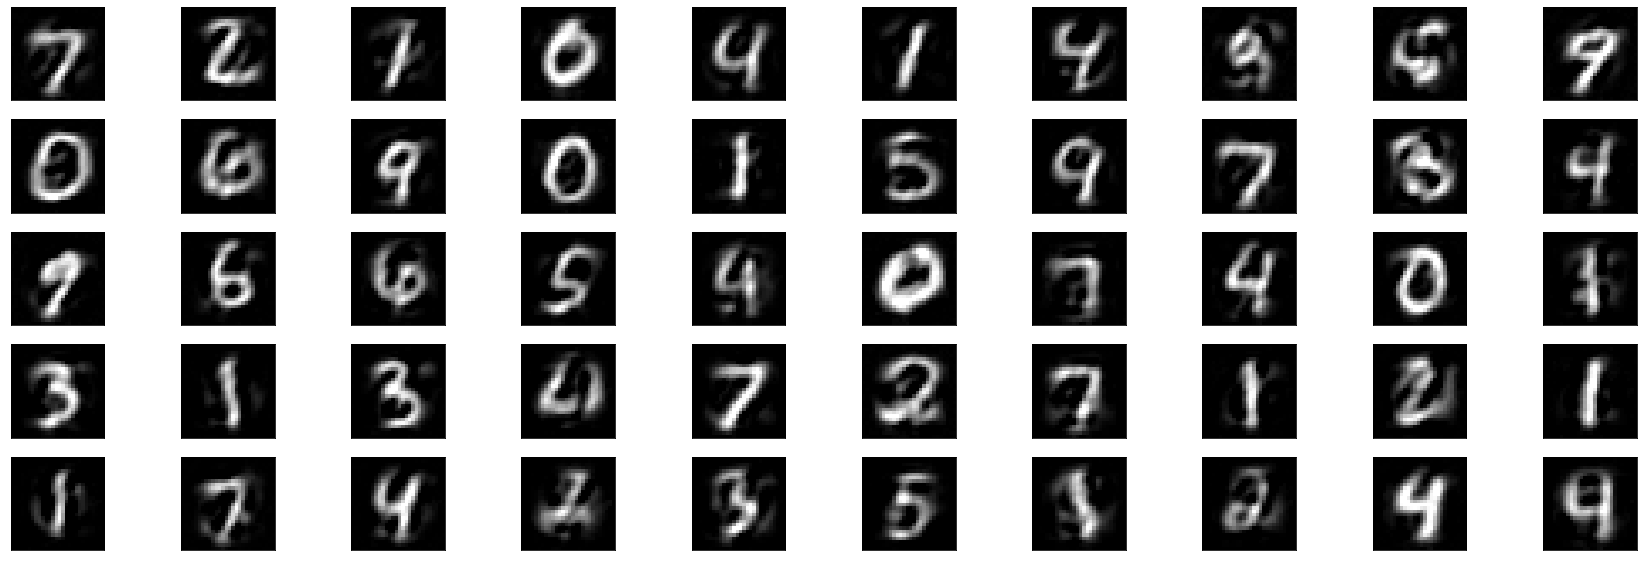

In [ ]:
plot_imgs_grid(preds.reshape(-1,*imshape))

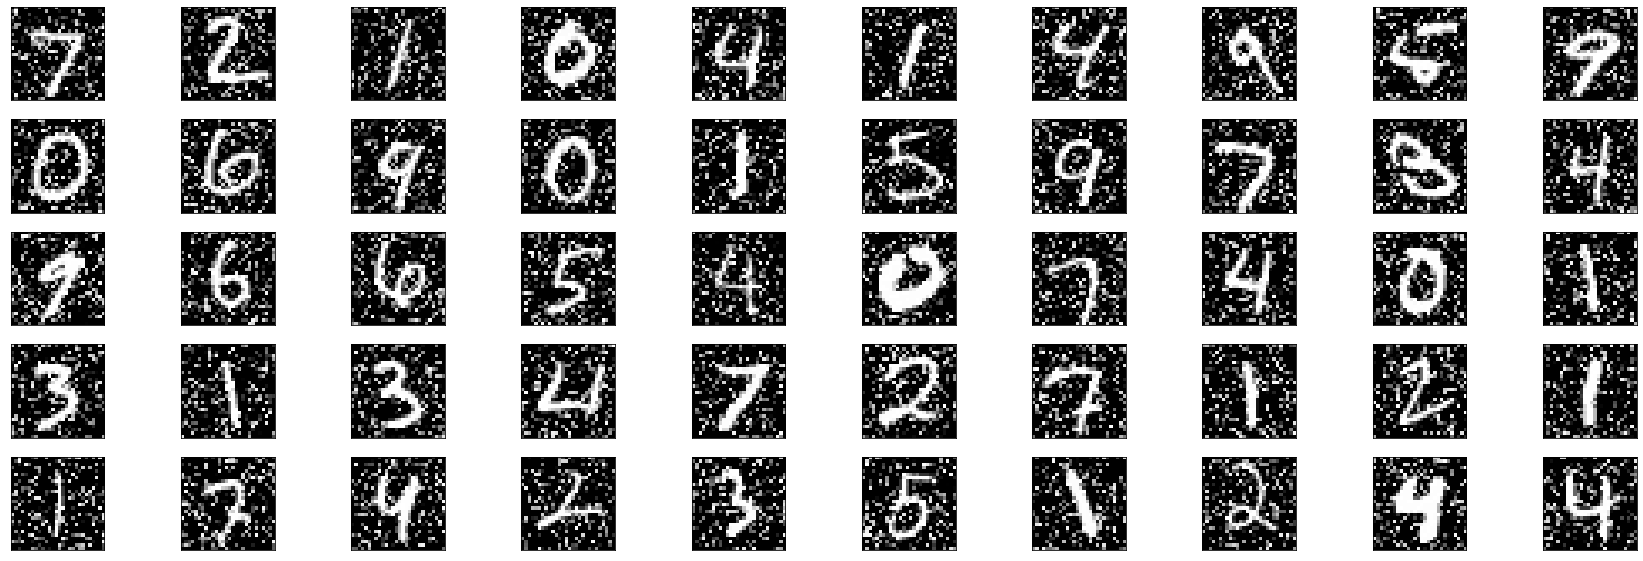

In [ ]:
plot_imgs_grid(noisy_x_test.reshape(-1,*imshape))